# Data Sourcing and Division

In [59]:
# Importing Libraries
import io
import requests
import pandas as pd 

In [110]:
# Obtaining the Data
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vSc_2y5N0I67wDU38DjDh35IZSIS30rQf7_NYZhtYYGU1jJYT6_kDx4YpF-qw0LSlGsBYP8pqM_a1Pd/pub?output=csv'
res = requests.get(url)

# Storing the data in a Pandas Data Frame
raw_data = pd.read_csv(io.BytesIO(res.content), sep=',')

### Preview obtained Data

In [115]:
raw_data

,Patient Number,State Patient Number,Date Announced,Estimated Onset Date,Age Bracket,Gender,Detected City,Detected District,Detected State,State code,Current Status,Notes,Contracted from which Patient (Suspected),Nationality,Type of transmission,Status Change Date,Source_1,Source_2,Source_3,Backup Notes
0,1,KL-TS-P1,30/01/2020,NaN,20,F,Thrissur,Thrissur,Kerala,KL,Recovered,Travelled from Wuhan,NaN,India,Imported,14/02/2020,https://twitter.com/vijayanpinarayi/status/122...,https://weather.com/en-IN/india/news/news/2020...,NaN,Student from Wuhan
1,2,KL-AL-P1,02/02/2020,NaN,NaN,NaN,Alappuzha,Alappuzha,Kerala,KL,Recovered,Travelled from Wuhan,NaN,India,Imported,14/02/2020,https://www.indiatoday.in/india/story/kerala-r...,https://weather.com/en-IN/india/news/news/2020...,NaN,Student from Wuhan
2,3,KL-KS-P1,03/02/2020,NaN,NaN,NaN,Kasaragod,Kasaragod,Kerala,KL,Recovered,Travelled from Wuhan,NaN,India,Imported,14/02/2020,https://www.indiatoday.in/india/story/kerala-n...,https://twitter.com/ANI/status/122422148580539...,https://weather.com/en-IN/india/news/news/2020...,Student from Wuhan
3,4,DL-P1,02/03/2020,NaN,45,M,East Delhi (Mayur Vihar),East Delhi,Delhi,DL,Recovered,"Travelled from Austria, Italy",NaN,India,Imported,15/03/2020,https://www.indiatoday.in/india/story/not-a-ja...,https://economictimes.indiatimes.com/news/poli...,NaN,Travel history to Italy and Austria
4,5,TS-P1,02/03/2020,NaN,24,M,Hyderabad,Hyderabad,Telangana,TG,Recovered,"Travelled from Dubai to Bangalore on 20th Feb,...",NaN,India,Imported,02/03/2020,https://www.deccanherald.com/national/south/qu...,https://www.indiatoday.in/india/story/coronavi...,https://www.thehindu.com/news/national/coronav...,"Travel history to Dubai, Singapore contact"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9236,9237,NaN,13/04/2020,NaN,NaN,NaN,NaN,NaN,West Bengal,WB,Hospitalized,Details awaited,NaN,NaN,NaN,13/04/2020,https://www.mohfw.gov.in/,NaN,NaN,NaN
9237,9238,NaN,13/04/2020,NaN,NaN,NaN,NaN,NaN,West Bengal,WB,Hospitalized,Details awaited,NaN,NaN,NaN,13/04/2020,https://www.mohfw.gov.in/,NaN,NaN,NaN
9238,9239,NaN,13/04/2020,NaN,NaN,NaN,NaN,NaN,West Bengal,WB,Hospitalized,Details awaited,NaN,NaN,NaN,13/04/2020,https://www.mohfw.gov.in/,NaN,NaN,NaN
9239,9240,NaN,13/04/2020,NaN,NaN,NaN,NaN,NaN,West Bengal,WB,Hospitalized,Details awaited,NaN,NaN,NaN,13/04/2020,https://www.mohfw.gov.in/,NaN,NaN,NaN


In [116]:
# Cleaning and Obtaining just the required columns of the data
data = raw_data[['Detected State','Detected City']]

# Removing all columns with missing values
data = data.dropna()

# Resetting index to avoid error
data.reset_index(inplace = True)

# Removing the extra column created by resetting index
data.drop(columns = ['index'],inplace = True)

# Preview the data to process
data

,Detected State,Detected City
0,Kerala,Thrissur
1,Kerala,Alappuzha
2,Kerala,Kasaragod
3,Delhi,East Delhi (Mayur Vihar)
4,Telangana,Hyderabad
...,...,...
1125,Karnataka,Hirebagewadi
1126,Karnataka,Raibagh
1127,Karnataka,Raibagh
1128,Chandigarh,Sector 37


# Defining Required Methods/Functions

In [103]:
'''
A function that can identify and returns name of city in each state that has maximum number of cases.
Used for Mathematical Proof of Concept.
'''

def identify(DF):
    DF.reset_index(inplace = True)
    LST = []
    # 'x' will have all the names of Cities in the State
    for x in DF['Detected City'].unique():
        # 'temp' is a DataFrame that contains details of the Current City
        temp = DF[DF['Detected City']==x]
        # The List 'DF' contains sub-lists with 'Name of City' and 'Number of Registered Cases'
        LST.append([x,temp['Detected City'].count()])
    # Converting the Nested List into a DataFrame
    DF_df = pd.DataFrame(LST)
    # Defining the Column Names
    DF_df.columns = ['City_Name','Number_Of_Patients']
    # Arranging the DataFrame in Descending Order to Obtain Cities with Max Cases on Top
    DF_df = DF_df.sort_values(by=['Number_Of_Patients'],ascending=False)
    DF_df.reset_index(inplace = True)
    return DF_df['City_Name'][0]

'''
A function that can identify and returns name of city and number of patients in each state.
Used for Visual Proof of Concept.
'''

def divide(DF):
    LST = []
    # 'x' will have all the names of Cities in the State
    for x in DF['Detected City'].unique():
        # 'temp' is a DataFrame that contains details of the Current City
        temp = DF[DF['Detected City']==x]
        # The List 'DF' contains sub-lists with 'Name of City' and 'Number of Registered Cases'
        LST.append([x,temp['Detected City'].count()])
    # Converting the Nested List into a DataFrame
    DF_df = pd.DataFrame(LST)
    # Defining the Column Names
    DF_df.columns = ['City_Name','Number_Of_Patients']
    # Arranging the DataFrame in Descending Order to Obtain Cities with Max Cases on Top
    DF_df = DF_df.sort_values(by=['Number_Of_Patients'],ascending=False)
    return DF_df

## Prooving Mathematically

In [104]:
# The dictionary SD will have Name of State and Name of corresponding city with max cases
sd = {}

for s_name in data['Detected State'].unique():
    sd[s_name] = identify(data[data['Detected State']==s_name])

In [105]:
# Converting the Obtained Dictionary to a Pandas Data Frame
final_data = pd.DataFrame.from_dict(sd, orient='index')

# Resetting Index so as to assign Column Names
final_data.reset_index(inplace = True)

# Assigning the Column Names
final_data.columns = ['Name of State','City with Maximum Cases']

In [100]:
final_data

,Name of State,City with Maximum Cases
0,Kerala,Kasaragod
1,Delhi,Nizamuddin area
2,Telangana,Hyderabad
3,Rajasthan,Bhilwara
4,Haryana,Gurugram
5,Uttar Pradesh,Noida
6,Ladakh,Leh
7,Tamil Nadu,Mettupalayam
8,Jammu and Kashmir,Hajin
9,Karnataka,Bengaluru


## Prooving Visually (2 Examples)

In [106]:
# Importing Libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

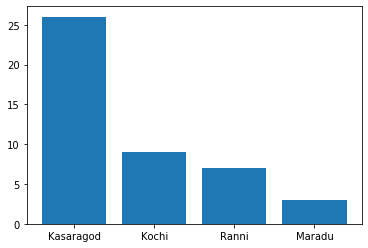

In [107]:
'''
Kerela Data
'''
KL_Data = data[data['Detected State'] == 'Kerala']
KL_Data = KL_Data.dropna()
KL_df = divide(KL_Data)

# Defining a Bar Graph
plt.bar(KL_df[:4]['City_Name'], KL_df[:4]['Number_Of_Patients'])

# Print the Graph
plt.show()

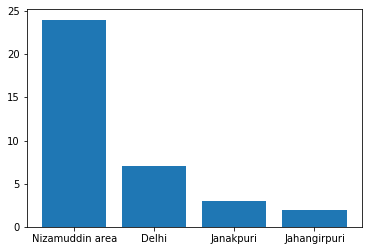

In [109]:
'''
Delhi Data
'''
DL_Data = data[data['Detected State'] == 'Delhi']
DL_Data = DL_Data.dropna()
DL_df = divide(DL_Data)

# Defining a Bar Graph
plt.bar(DL_df[:4]['City_Name'], DL_df[:4]['Number_Of_Patients'])

# Print the Graph
plt.show()

# Final Results

Through Mathematical and Visual approach it is confirmed that the proposed system is able to identify Hotposts in Each State of India.